In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:

    def __init__(self, lr = 0.001, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(x, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(x.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, x):
        y_pred = np.dot(x, self.weights) + self.bias
        return y_pred

In [3]:
x, y = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

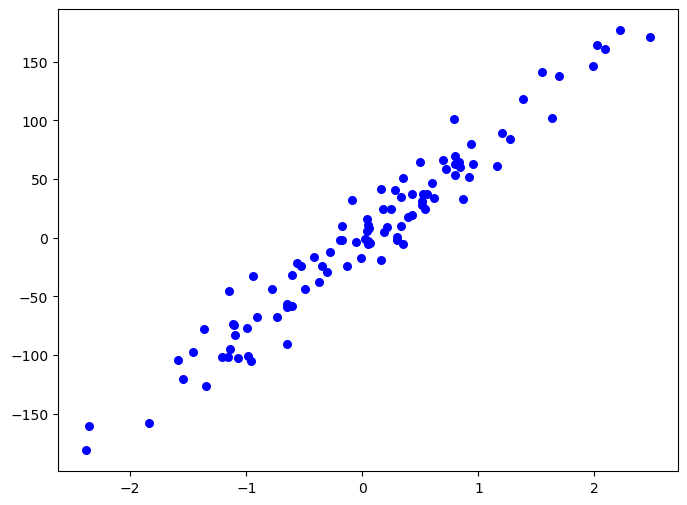

In [4]:
fig = plt.figure(figsize = (8, 6))
plt.scatter(x[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

In [5]:
reg = LinearRegression(lr = 0.1)
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)

In [6]:
def mse(y_test, predictions):
    return np.mean((y_test - predictions) ** 2)

In [7]:
mse = mse(y_test, predictions)

In [8]:
mse

305.77413162286416

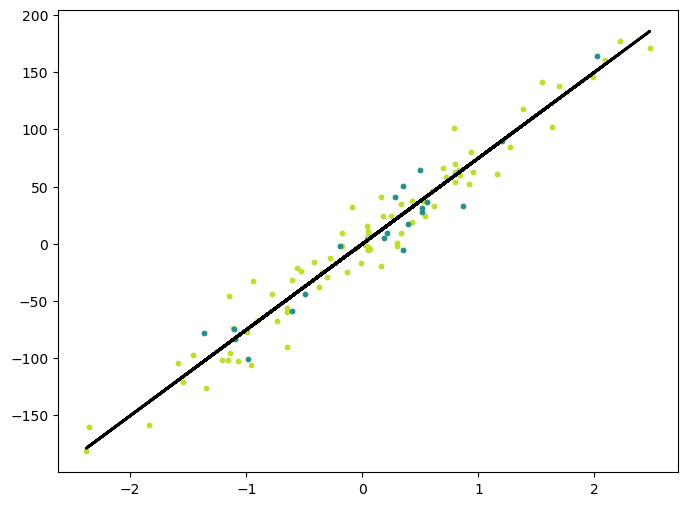

In [9]:
y_pred_line = reg.predict(x)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize = (8, 6))
m1 = plt.scatter(x_train, y_train, color = cmap(0.9), s = 10)
m2 = plt.scatter(x_test, y_test, color = cmap(0.5), s = 10)
plt.plot(x, y_pred_line, color = 'black', linewidth = 2, label = 'Prediction')
plt.show()